In [3]:
# Creating PCA plot for the SIEDS Paper
# Catherine Beazley

In [6]:
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

In [42]:
# Reading a clean, 10 million row subset of the data I previously created and saved into a csv 
start = time.time()
df = pd.read_csv('RandomSample10mill_withClusters.csv')
end = time.time()
print(end - start)

18.753504037857056


In [ ]:
# Replace above with mobus x or something to use day 3
# 1. Find medians and standard deviations of all numerical columns
# 2. Take a random sample of 10 million. keep it if it is within 1 std from median. CLuster it.
# 3. Do everything below
#    a) plot raw dst vs src packets-- do this for 10 million sample and full set
#    b) plot log of above-- do this for 10 million sample and full set
#    c) pca of numerical then color code by cluster assignment
#    d) pca of numerical and protocol and color code by cluster assignment and then by protocol
# 4. Find 7 clusters
# 5. maybe show inter cluster distance is maximized with 7???

In [43]:
df["SlopeClusterAssign"] = df["SlopeClusterAssign"].astype("category")

In [44]:
df.head()

,Unnamed: 0,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes,SlopeClusterAssign
0,110608810,1970-01-02 23:00:51,0,Comp255696,Comp257274,6,Port78720,Port20301,2.000000e+00,4,112,216,1.0
1,12287378,1970-01-02 10:19:18,0,Comp826300,Comp275646,17,Port48708,53,1.000000e+00,0,69,0,0.0
2,44108309,1970-01-02 13:22:56,36,Comp120187,Comp708267,6,Port29614,80,7.000000e+00,6,711,1411,1.0
3,5872997,1970-01-02 09:46:44,1,Comp989973,Comp108157,17,Port74125,427,1.000000e-22,1,0,345,2.0
4,18153648,1970-01-02 10:49:50,12,Comp257274,Comp935614,6,Port55791,Port79662,5.000000e+00,0,286,0,0.0


In [45]:
# Taking Log of all Numerical Columns-- if value is 0, then I keep 0; otherwise I take the log
# I used >= 1 because pandas had 0 = 1*e-22 or some very small number in some cases and this was a way to handle that
df["Duration"].loc[df["Duration"] >= 1] = np.log(df["Duration"][df["Duration"] >= 1])
df["SrcPackets"].loc[df["SrcPackets"] >= 1] = np.log(df["SrcPackets"][df["SrcPackets"] >= 1])
df["DstPackets"].loc[df["DstPackets"] >= 1] = np.log(df["DstPackets"][df["DstPackets"] >= 1])
df["SrcBytes"].loc[df["SrcBytes"] >= 1] = np.log(df["SrcBytes"][df["SrcBytes"] >= 1])
df["DstBytes"].loc[df["DstBytes"] >= 1] = np.log(df["DstBytes"][df["DstBytes"] >= 1])

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
df.head()

,Unnamed: 0,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes,SlopeClusterAssign
0,110608810,1970-01-02 23:00:51,0.000000,Comp255696,Comp257274,6,Port78720,Port20301,6.931472e-01,1.386294,4.718499,5.375278,1.0
1,12287378,1970-01-02 10:19:18,0.000000,Comp826300,Comp275646,17,Port48708,53,0.000000e+00,0.000000,4.234107,0.000000,0.0
2,44108309,1970-01-02 13:22:56,3.583519,Comp120187,Comp708267,6,Port29614,80,1.945910e+00,1.791759,6.566672,7.252054,1.0
3,5872997,1970-01-02 09:46:44,0.000000,Comp989973,Comp108157,17,Port74125,427,1.000000e-22,0.000000,0.000000,5.843544,2.0
4,18153648,1970-01-02 10:49:50,2.484907,Comp257274,Comp935614,6,Port55791,Port79662,1.609438e+00,0.000000,5.655992,0.000000,0.0


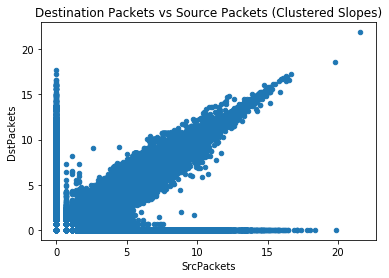

60.26351809501648


In [58]:
start = time.time()
df.plot(x="SrcPackets", y="DstPackets", kind='scatter', title='Destination Packets vs Source Packets (Clustered Slopes)')
plt.show()
end = time.time()
print(end - start)

In [49]:
# Scaling for PCA
start = time.time()
pre = preprocessing.scale(df[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"]])
pre = pd.DataFrame.from_records(pre, columns = ["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"])
pre['Protocol'] = df["Protocol"].values
pre.head()
end = time.time()
print(end - start)

18.12470030784607


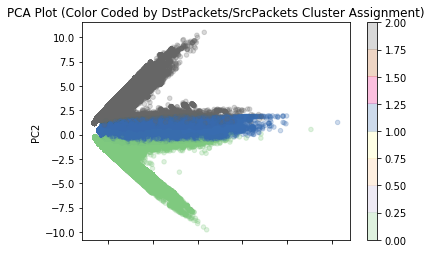

262.8036708831787


In [36]:
# PCA plot of just numerical values-- color coded
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot (Color Coded by DstPackets/SrcPackets Cluster Assignment)', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.show()
end = time.time()
print(end - start)

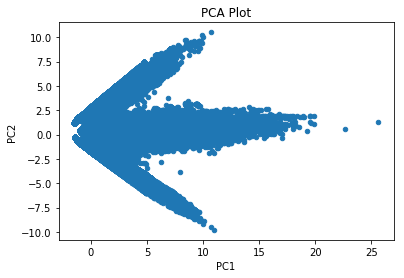

67.24124360084534


In [50]:
# PCA plot of just numerical values-- NOT color coded
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot')
plt.show()
end = time.time()
print(end - start)

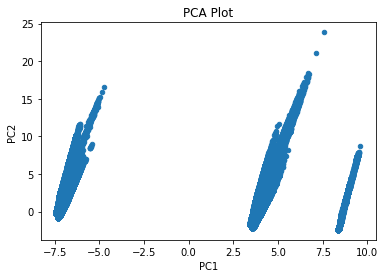

69.98325252532959


In [38]:
# PCA plot of protocol and numerical values-- NOT color coded
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot')
plt.show()
end = time.time()
print(end - start)

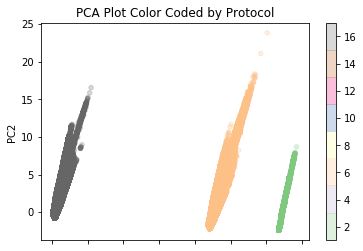

270.06659984588623


In [52]:
# PCA plot of protocol and numerical values-- color coded by Protocol
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Protocol', 
          c=df["Protocol"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.show()
end = time.time()
print(end - start)

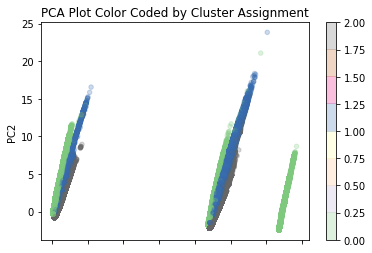

263.9326980113983


In [51]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.show()
end = time.time()
print(end - start)

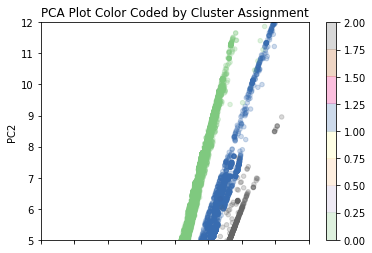

194.8221356868744


In [53]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets-- Zoomed in on left cluster
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.xlim([-9,-5])
plt.ylim([5,12])
plt.show()
end = time.time()
print(end - start)


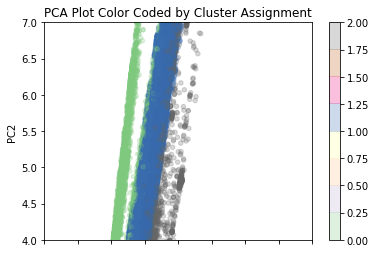

190.95119619369507


In [57]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets-- 
# Zoomed in on center cluster
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.xlim([3,7])
plt.ylim([4,7])
plt.show()
end = time.time()
print(end - start)

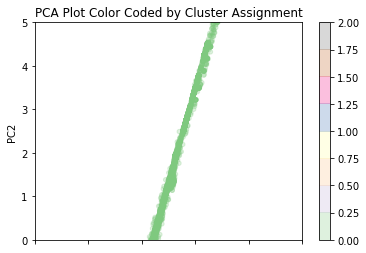

206.44795417785645


In [55]:
# PCA plot of protocol and numerical values-- color coded by Cluster assignment for DstPackets/SrcPackets-- 
# Zoomed in on right cluster
start = time.time()
pcaDF = pre[["Duration", "SrcPackets", "DstPackets", "SrcBytes", "DstBytes", "Protocol"]]
pca = PCA(n_components=2).fit_transform(pcaDF)
pcdf = pd.DataFrame(data = pca, columns = ['PC1', 'PC2'])
pcdf.plot(x="PC1", y="PC2", kind='scatter', title='PCA Plot Color Coded by Cluster Assignment', 
          c=df["SlopeClusterAssign"], legend=True, colormap = 'Accent', alpha = 0.25)
plt.xlim([7.5,10])
plt.ylim([0,5])
plt.show()
end = time.time()
print(end - start)